# Final Project - Hotel

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_hotel = pd.read_csv("data_hotel.csv")
data_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Properties

In [3]:
#Total row & column; data type

data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#Show only column with null value

null_column = data_hotel.isnull().sum()

print(null_column[null_column>0])

children         4
country        488
agent        16340
company     112593
dtype: int64


## Descriptive Statistic

In [5]:
#descriptive statistic

data_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Exploratory

### Total of unique value in each column

In [6]:
data_hotel.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

### Cancel rate in each hotel

In [7]:
city_hotel = data_hotel["hotel"].value_counts()[0]
resort_hotel = data_hotel["hotel"].value_counts()[1]

print(f"City Hotel is booked for {city_hotel} times.\nResort Hotel is booked for {resort_hotel} times.")

City Hotel is booked for 79330 times.
Resort Hotel is booked for 40060 times.


In [8]:
# 0 = not canceled; 1 = is canceled
data_hotel[["hotel","is_canceled"]].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
dtype: int64

In [9]:
city_hotel_cancel = data_hotel[["hotel","is_canceled"]].value_counts()[1]
resort_hotel_cancel = data_hotel[["hotel","is_canceled"]].value_counts()[3]

print(f"City Hotel is canceled for {city_hotel_cancel} times.\nResort Hotel is canceled for {resort_hotel_cancel} times.")

City Hotel is canceled for 33102 times.
Resort Hotel is canceled for 11122 times.


In [10]:
#Cancel rate
city_hotel_cancelrate = "{:.2%}".format(city_hotel_cancel/city_hotel)
resort_hotel_cancelrate = "{:.2%}".format(resort_hotel_cancel/resort_hotel)

print(f"City Hotel has {city_hotel_cancelrate} cancel rate.\nResort Hotel has {resort_hotel_cancelrate} cancel rate.")

City Hotel has 41.73% cancel rate.
Resort Hotel has 27.76% cancel rate.


### Preferred deposit type

In [11]:
data_hotel["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [12]:
data_hotel[["hotel","deposit_type"]].value_counts().sort_index(ascending=True)

hotel         deposit_type
City Hotel    No Deposit      66442
              Non Refund      12868
              Refundable         20
Resort Hotel  No Deposit      38199
              Non Refund       1719
              Refundable        142
dtype: int64

### Top 10 Tourist Origins

In [13]:
top_ten_origin_code = data_hotel["country"].value_counts().head(10)
top_ten_origin_code

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [14]:
#convert the series above to dataframe
df_top_ten_origin_code = top_ten_origin_code.to_frame()
df_top_ten_origin_code.reset_index(inplace = True)
df_top_ten_origin_code.rename(columns = {'index' : 'Code'}, inplace = True)
df_top_ten_origin_code

,Code,country
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


In [15]:
#import file with country code and country name
country_codes = pd.read_excel("data_country_codes.xlsx")
country_codes.head()

,Code,Country name
0,AFG,Afghanistan
1,ALA,Åland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa


In [16]:
#left join
top_ten_origin_join = pd.merge(df_top_ten_origin_code, country_codes, on = 'Code', how = 'left')
top_ten_origin_join

,Code,country,Country name
0,PRT,48590,Portugal
1,GBR,12129,United Kingdom of Great Britain and Northern I...
2,FRA,10415,France
3,ESP,8568,Spain
4,DEU,7287,Germany
5,ITA,3766,Italy
6,IRL,3375,Ireland
7,BEL,2342,Belgium
8,BRA,2224,Brazil
9,NLD,2104,Netherlands (the)


## Summary  
1. Guests are from 177 different countries  
2. In average, guest booked the hotel 104 days in advanced  
3. `City Hotel` is booked almost twice as much as `Resort Hotel`  
4. `City Hotel` has higher cancel rate which is 41.73% while `Resort Hotel` cancel rate is just 27.76%
5. Preferred deposit type by guests from both hotel is **No Deposit**  
6. Most guests are from Portugal

## Missing Value

In [17]:
#drop column 'company' with more than 50% missing value
data_hotel_edited = data_hotel.drop(columns = ['company'])

In [18]:
#fill column 'country' and 'children' missing country with mode
data_hotel_edited['country'] = data_hotel_edited['country'].fillna(data_hotel_edited['country'].mode()[0])
data_hotel_edited['children'] = data_hotel_edited['children'].fillna(data_hotel_edited['children'].mode()[0])

In [19]:
#Show only column with null value

null_column_edited = data_hotel_edited.isnull().sum()

print(null_column_edited[null_column_edited>0])

agent    16340
dtype: int64


In [20]:
#fill column 'agent' missing value with mean
data_hotel_edited['agent'] = data_hotel_edited['agent'].fillna(data_hotel_edited['agent'].mean())

In [21]:
#Show only column with null value

null_column_edited = data_hotel_edited.isnull().sum()

print(null_column_edited[null_column_edited>0])

Series([], dtype: int64)


## Categorize Lead Time

In [22]:
# lead_time <= 18 : Short, lead_time 19 - 69 : Medium, lead_time >= 70 : Long

data_hotel_edited['lead_time_category'] = np.where(data_hotel_edited['lead_time'] <= 18, "Short", np.where(data_hotel_edited['lead_time']>= 70, "Long","Medium"))
data_hotel_edited.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01,Long
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01,Long
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out,2015-07-02,Short
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out,2015-07-02,Short
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,2015-07-03,Short


## Filter where reservation_status_date >= 2017

In [23]:
# parse reservation_status_date to datetime
data_hotel_edited["reservation_status_date"] = pd.to_datetime(data_hotel_edited["reservation_status_date"])

In [24]:
filtered_data = data_hotel_edited.loc[(data_hotel_edited['reservation_status_date'] >= '01-01-2017')]
filtered_data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_category
9788,Resort Hotel,1,89,2017,January,1,2,1,3,2,...,No Deposit,240.000000,0,Transient,46.8,0,1,No-Show,2017-01-02,Long
9805,Resort Hotel,1,6,2017,January,1,4,0,1,1,...,No Deposit,86.693382,0,Transient,39.0,0,0,Canceled,2017-01-03,Short
9809,Resort Hotel,1,112,2017,January,1,4,2,4,2,...,No Deposit,240.000000,0,Transient,52.0,0,2,No-Show,2017-01-04,Long


## Visualization

In [34]:
#Where the booking is not canceled & only show city hotel
data_hotel_city = data_hotel_edited.loc[(data_hotel_edited['is_canceled'] == 0) & (data_hotel_edited['hotel'] == 'City Hotel')]

data_hotel_city.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_category
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0,Transient,0.00,0,0,Check-Out,2015-07-03,Short
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05,Short
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,Medium


In [35]:
#Where the booking is not canceled & only show resort hotel
data_hotel_resort = data_hotel_edited.loc[(data_hotel_edited['is_canceled'] == 0) & (data_hotel_edited['hotel'] == 'Resort Hotel')]
data_hotel_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01,Long
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,2015-07-01,Long
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out,2015-07-02,Short


In [27]:
#dataframe for City Hotel arrival per month

#return series convert to dataframe then reset index
month_city = data_hotel_city["arrival_date_month"].value_counts().to_frame()
month_city.reset_index(inplace = True)

#rename columns
month_city.rename(columns = {'index' : 'month', 'arrival_date_month' : 'city_hotel_visitor'}, inplace = True)

In [28]:
#dataframe for Resort Hotel arrival per month

#return series convert to dataframe then reset index
month_resort = data_hotel_resort["arrival_date_month"].value_counts().to_frame()
month_resort.reset_index(inplace = True)

#rename columns
month_resort.rename(columns = {'index' : 'month', 'arrival_date_month' : 'resort_hotel_visitor'}, inplace = True)

In [29]:
#join both table and add a calculated column that shows the total of both
visitor = pd.merge(month_city, month_resort, on = 'month', how = 'left')
visitor['total'] = visitor['city_hotel_visitor'] + visitor['resort_hotel_visitor']
visitor

,month,city_hotel_visitor,resort_hotel_visitor,total
0,August,5381,3257,8638
1,July,4782,3137,7919
2,May,4579,2535,7114
3,June,4366,2038,6404
4,October,4337,2577,6914
5,September,4290,2102,6392
6,March,4072,2573,6645
7,April,4015,2550,6565
8,February,3064,2308,5372
9,November,2696,1976,4672


In [30]:
sorter = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [31]:
#convert month column into category dtype
visitor.month = visitor.month.astype("category")
visitor.month.cat.set_categories(sorter, inplace=True)

#sort by month with custom order
visitor_sorted = visitor.sort_values("month",ignore_index=True)
visitor_sorted

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\arrays\categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,month,city_hotel_visitor,resort_hotel_visitor,total
0,January,2254,1868,4122
1,February,3064,2308,5372
2,March,4072,2573,6645
3,April,4015,2550,6565
4,May,4579,2535,7114
5,June,4366,2038,6404
6,July,4782,3137,7919
7,August,5381,3257,8638
8,September,4290,2102,6392
9,October,4337,2577,6914


In [32]:
visitor_sorted.idxmax()

month                   11
city_hotel_visitor       7
resort_hotel_visitor     7
total                    7
dtype: int64

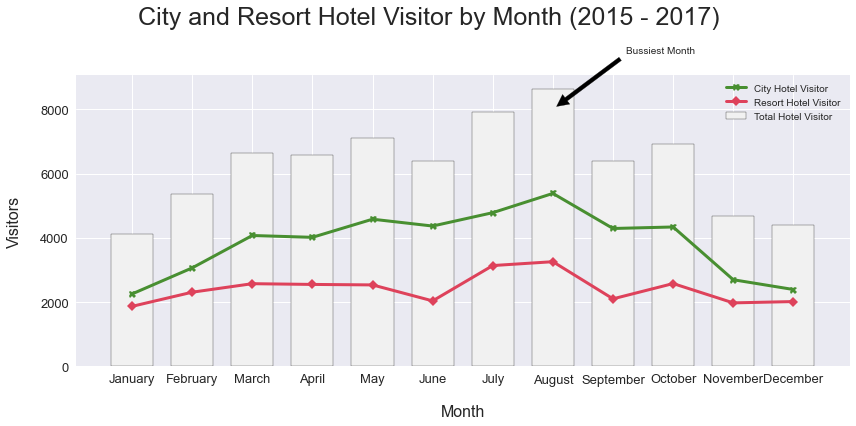

In [36]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(12, 6))

x = visitor_sorted['month']
y1 = visitor_sorted['city_hotel_visitor']
y2 = visitor_sorted['resort_hotel_visitor']
y3 = visitor_sorted['total']

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(13)

ax.plot(x, y1, label = 'City Hotel Visitor', color = '#488f31', linewidth = 3, marker = 'X')
ax.plot(x, y2, label = 'Resort Hotel Visitor', color = '#de425b', linewidth = 3, marker = 'D')
ax.bar(x, y3, 0.7, label = 'Total Hotel Visitor', color ='#f1f1f1', edgecolor = 'black')
plt.xlabel('Month', fontsize=16, labelpad=18)
plt.ylabel('Visitors', fontsize=16, labelpad=18)

fig.suptitle('City and Resort Hotel Visitor by Month (2015 - 2017)', fontsize = 25)
leg = ax.legend()

ax.annotate('Bussiest Month', xy=(7,8000), xycoords='data',
            xytext=(0.8, 1.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.tight_layout()
plt.show()